# Donation Statistics by Occupation and Employer

Donations by occupation is another oft-studied statistic. For example, lawyers(attorneys) tend to denote more meney to Democtats, while business expecutives tend to donate more to Republicans. You have no reason to believe me; you can see for yourself in the data. First, the total number of donations by occupations is easy:

In [1]:
import pandas as pd
from pandas import DataFrame, Series

In [2]:
fec = pd.read_csv('../../CSV Files/O_Reilly/ch09/P00000001-ALL.csv')

C:\Users\mbkmu\AppData\Local\Temp\ipykernel_6472\1772836145.py:1: DtypeWarning: Columns (6) have mixed types. Specify dtype option on import or set low_memory=False.
  fec = pd.read_csv('../../CSV Files/O_Reilly/ch09/P00000001-ALL.csv')


In [29]:
fec.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1001731 entries, 0 to 1001730
Data columns (total 17 columns):
 #   Column             Non-Null Count    Dtype  
---  ------             --------------    -----  
 0   cmte_id            1001731 non-null  object 
 1   cand_id            1001731 non-null  object 
 2   cand_nm            1001731 non-null  object 
 3   contbr_nm          1001731 non-null  object 
 4   contbr_city        1001712 non-null  object 
 5   contbr_st          1001727 non-null  object 
 6   contbr_zip         1001620 non-null  object 
 7   contbr_employer    988002 non-null   object 
 8   contbr_occupation  993301 non-null   object 
 9   contb_receipt_amt  1001731 non-null  float64
 10  contb_receipt_dt   1001731 non-null  object 
 11  receipt_desc       14166 non-null    object 
 12  memo_cd            92482 non-null    object 
 13  memo_text          97770 non-null    object 
 14  form_tp            1001731 non-null  object 
 15  file_num           1001731 non-n

In [3]:
parties = {'Bachmann, Michelle': 'Republican',
 'Cain, Herman': 'Republican',
 'Gingrich, Newt': 'Republican',
 'Huntsman, Jon': 'Republican',
 'Johnson, Gary Earl': 'Republican',
 'McCotter, Thaddeus G': 'Republican',
 'Obama, Barack': 'Democrat',
 'Paul, Ron': 'Republican',
 'Pawlenty, Timothy': 'Republican',
 'Perry, Rick': 'Republican',
 "Roemer, Charles E. 'Buddy' III": 'Republican',
 'Romney, Mitt': 'Republican',
 'Santorum, Rick': 'Republican'}

In [11]:
fec['party'] = fec.cand_nm.map(parties)

In [4]:
fec.contbr_occupation.value_counts()

RETIRED                         234829
INFORMATION REQUESTED            35176
ATTORNEY                         34409
HOMEMAKER                        30199
PHYSICIAN                        23530
                                 ...  
HEALTH SYSTEMS SPECIALIST            1
LIBRARY REFERENCE                    1
AP SPECIALIST                        1
MICHIGAN STATE UNIVERSITY            1
LONGWALL MAINTENANCE FOREMAN         1
Name: contbr_occupation, Length: 45073, dtype: int64

You will notice by looking at the occupations that many refer to the same basic job type, or there are several variants of the same thing. Here is a code snippet illustrates a technique for cleaning up a few of them by mapping from one occupation to another; note the "trick" of allow occupations with on mapping to "pass through":

In [5]:
occ_mapping = {
 'INFORMATION REQUESTED PER BEST EFFORTS' : 'NOT PROVIDED',
 'INFORMATION REQUESTED' : 'NOT PROVIDED',
 'INFORMATION REQUESTED (BEST EFFORTS)' : 'NOT PROVIDED',
 'C.E.O.': 'CEO'
}

# If no mapping provided, return x
f = lambda x: occ_mapping.get(x,x)

I'll also do the same hing for employers:

In [7]:
emp_mapping = {
 'INFORMATION REQUESTED PER BEST EFFORTS' : 'NOT PROVIDED',
 'INFORMATION REQUESTED' : 'NOT PROVIDED',
 'SELF' : 'SELF-EMPLOYED',
 'SELF EMPLOYED' : 'SELF-EMPLOYED',
}

# if no mapping provided, return x
f = lambda x: emp_mapping.get(x, x)
fec.contbr_employer = fec.contbr_employer.map(f)

Now, you can use *pivot_table* to aggregate the data by party and occupation, then filter down to the subset that donated at least $2 million overall:

In [12]:
by_occupation = fec.pivot_table('contb_receipt_amt',
                                index='contbr_occupation',
                                columns='party', aggfunc='sum')

In [15]:
over_2mm = by_occupation[by_occupation.sum(1) > 2000000]

In [16]:
over_2mm

party,Democrat,Republican
contbr_occupation,,
ATTORNEY,11126932.97,7343540.33
C.E.O.,1690.00,2431528.11
CEO,2069784.79,1501157.41
CONSULTANT,2459812.71,2472815.27
ENGINEER,950425.55,1780101.88
EXECUTIVE,1355161.05,3918556.85
HOMEMAKER,4243394.30,13241413.35
INFORMATION REQUESTED,4849801.96,3892555.63
INFORMATION REQUESTED PER BEST EFFORTS,NaN,15859514.55


It can be easier to look at this data graphically as a bar plot ('*barh*' means horizontal bar plot)

<AxesSubplot:xlabel='contbr_occupation'>

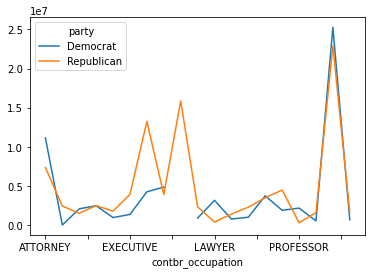

In [18]:
over_2mm.plot()

<AxesSubplot:ylabel='contbr_occupation'>

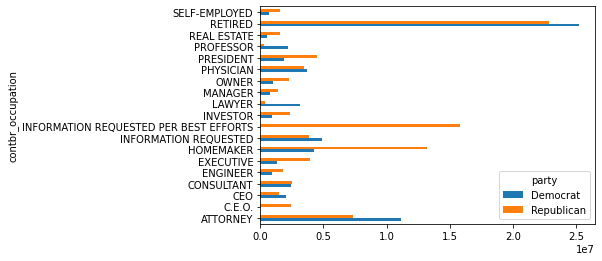

In [20]:
over_2mm.plot(kind = "barh")

You might be interested in the top donor occupations or top companies donating to Obama and Romney. To do this, you can group by canditate name and use a variant of the *top* method from earlier in the chapter:

In [34]:
def get_top_amounts(group, key, n = 5):
    totals = group.groupby(key)['contb_receipt_amt'].sum()

    # Order totals by key in descending order
    return totals.order(ascending = False)[-n:]

Then aggregated by occupation and employer:

In [36]:
grouped = fec.groupby('cand_nm')

In [37]:
grouped.apply(get_top_amounts, 'contbr_occupation', n = 7)

AttributeError: 'Series' object has no attribute 'order'